# 4) Quantum Error Correction

### Quantum Hackathon 2025

Society of Quantum Engineers

San Jose State University

In [2]:
"""
Copyright (c) 2025 James Saslow
All rights reserved.

This software is proprietary but may be used for personal and educational purposes. 
Commercial use, modification, or distribution without prior written permission is prohibited.

For licensing inquiries, contact: jamessaslow@gmail.com or james.saslow@sjsu.edu
"""

'\nCopyright (c) 2025 James Saslow\nAll rights reserved.\n\nThis software is proprietary but may be used for personal and educational purposes. \nCommercial use, modification, or distribution without prior written permission is prohibited.\n\nFor licensing inquiries, contact: jamessaslow@gmail.com or james.saslow@sjsu.edu\n'

One of the great challenges of quantum computing is to develop a method to mitigate and "correct" noise in quantum circuits. *Enter quantum error correction*, where three qubits are better than 1! Instead of computing single qubit gates on one qubit, we compute single qubit gates using a system of three qubits (called a logical qubit) in order to check the operations that each qubit makes to ensure reliable implementation of a gate.


Here is code for an $X$ gate that we looked at in Notebook 0) Intro to Quantum Computing ()

# Program for a Plain ol' $X$-gate

In [3]:
# Importing Packages
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise.errors import depolarizing_error

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Checking the Qiskit version

"""
NOTE: I am using Qiskit version 1.4.1
"""

qiskit.__version__

'1.4.1'

     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


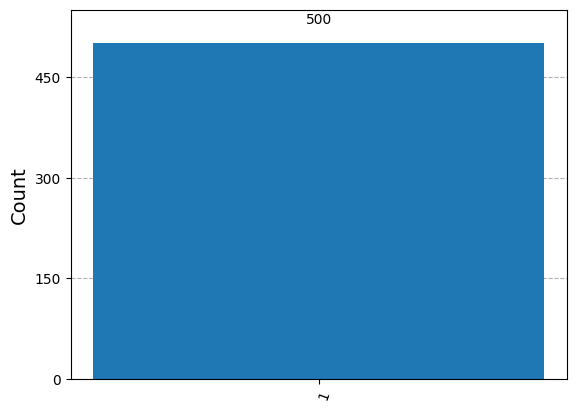

In [5]:
# Quantum Program for an X - Gate

# ============================================
# Initializing Registers & Quantum Circuit
q       = QuantumRegister(1, name = 'q')
c       = ClassicalRegister(1, name = 'c')
qc      = QuantumCircuit(q,c, name = 'qc')
# ============================================
# Prototyping the Quantum Circuit

# NOTE: Qubits are always initialized in the |0> State

qc.x(q[0])                  # Performing an X-gate on the 0th qubit
qc.measure(q[0], c[0])      # Performing a measurement operation
print(qc)                   # Printing the quantum circuit architecture

# ============================================
# Classical Simulator

backend = BasicSimulator()                        # Choosing a classical simulator to emulate our quantum circuit
qc_rev = qc.reverse_bits()                        # Displaying results in big endian
result = backend.run(qc_rev, shots=500).result()  # Doing 500 measurement shots on our circuit
counts = result.get_counts() 

plot_histogram(counts) # Plotting a histogram of the measurement outcomes

### Question: Why do we only get back the $\ket{1}$ state? Why don't we measure any $\ket{0}$'s here?

In [6]:
"""
Your Answer (You can switch to Markdown if you prefer Latex typing)
"""

'\nYour Answer (You can switch to Markdown if you prefer Latex typing)\n'

______________________________________________________________________________________________________

# Program for an $X$-gate ... but with Noise!

Here, we are going to analyze the $X$ gate, but with a noise model

     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


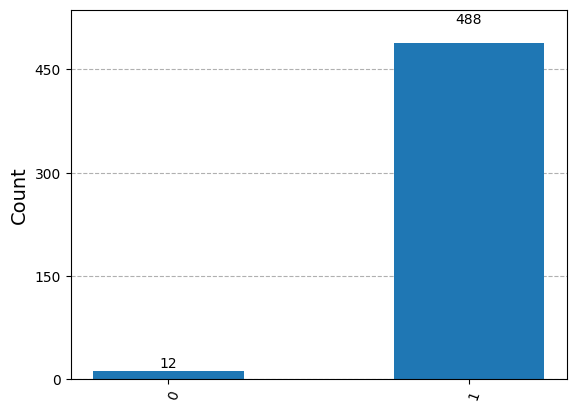

In [7]:

# Quantum Program for an X - Gate with Noise

# ============================================
# Initializing Registers & Quantum Circuit
q = QuantumRegister(1, name='q')
c = ClassicalRegister(1, name='c')
qc = QuantumCircuit(q, c, name='qc')
# ============================================
# Prototyping the Quantum Circuit

# NOTE: Qubits are always initialized in the |0> State

# X gate and Measurement
qc.x(q[0])
qc.measure(q[0], c[0])
print(qc)

# ============================================
# Defining a noise model

noise_model = NoiseModel()
x_error = depolarizing_error(0.05, 1)     # 5% error
meas_error = depolarizing_error(0.02, 1)  # 2% measurement error

noise_model.add_all_qubit_quantum_error(x_error, ['x'])
noise_model.add_all_qubit_quantum_error(meas_error, ['measure'])

# ============================================
# Classical Simulator
simulator = AerSimulator(noise_model=noise_model)
qc_transpiled = transpile(qc.reverse_bits(), simulator)

result = simulator.run(qc_transpiled, shots=500).result()
counts = result.get_counts()

plot_histogram(counts)


### Question: Why do we fail to recover the $\ket{1}$ state 100% of the time? What is the noise model doing?

In [8]:
"""
Your Answer (You can switch to Markdown if you prefer Latex typing)
"""

'\nYour Answer (You can switch to Markdown if you prefer Latex typing)\n'

________________________________________________________________________________________________________________________________

# Let's Correct some Quantum Errors!

Prototype the following quantum circuit in Qiskit. This is a syndrome error correction method that corrects quantum errors. Implement the quantum circuit with and without the noise model to observe the effects noise has on the system.


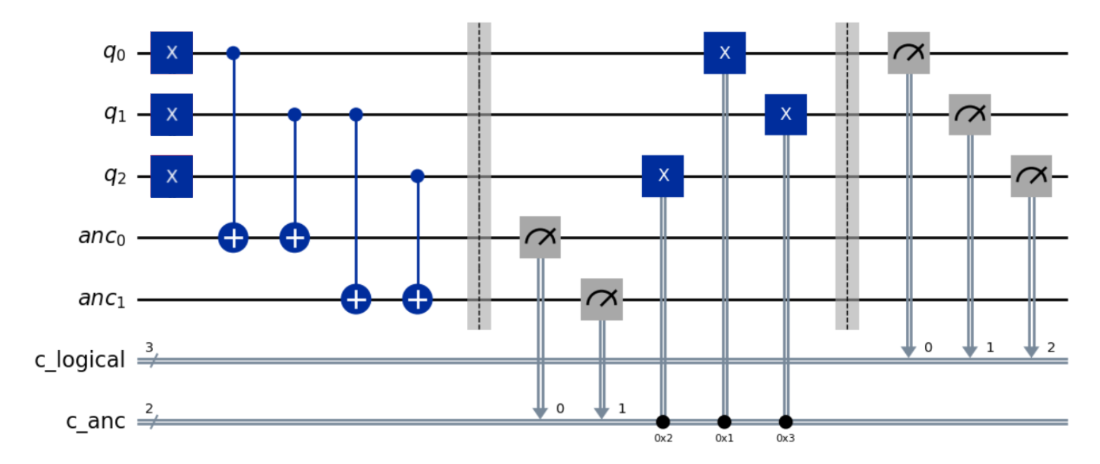

C:\Users\james\AppData\Local\Temp\ipykernel_126076\1803953661.py:37: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(q_logical[2]).c_if(c_anc, 2) # X on q2 if ancilla measures |01>
C:\Users\james\AppData\Local\Temp\ipykernel_126076\1803953661.py:38: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(q_logical[0]).c_if(c_anc, 1) # X on q0 if ancilla measures |10>
C:\Users\james\AppData\Local\Temp\ipykernel_126076\1803953661.py:39: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(q_logical[1]).c_if(c_anc, 3) # X on q1 if ancilla measures |11>


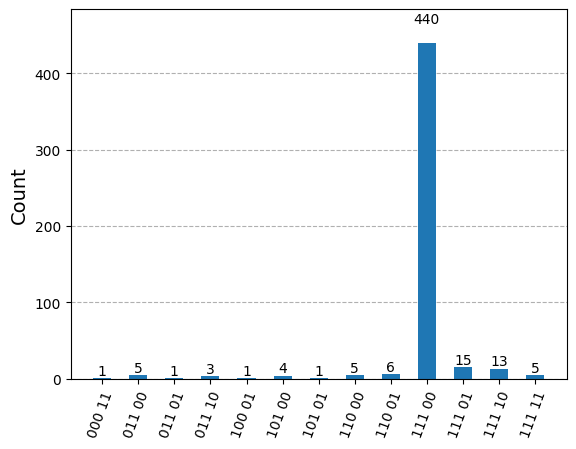

In [9]:
"""
Finish the Qiskit code for a Quantum Error Corrected X-gate
"""

# ===============================================
# Initializing Registers & Quantum Circuit

q_logical  =  QuantumRegister(3, name = 'q')
q_anc      =  QuantumRegister(2, name = 'anc')
c_logical  = ClassicalRegister(3, name = 'c_logical')
c_anc      = ClassicalRegister(2, name = 'c_anc')

qc         =  QuantumCircuit(q_logical, q_anc,c_logical,c_anc,name = 'qc')

 # ===============================================
  # Prototyping Quantum Circuit

  # Performing the single qubit gate on the logical qubit 
for i in range(3):
    qc.x(q_logical[i])

# Sending information to ancillas
qc.cx(q_logical[0], q_anc[0])
qc.cx(q_logical[1], q_anc[0])

qc.cx(q_logical[1], q_anc[1])
qc.cx(q_logical[2], q_anc[1])

qc.barrier()

# Setting up ancilla measurement
qc.measure(q_anc[0],c_anc[0])
qc.measure(q_anc[1],c_anc[1])


# Syndrome Operations (Check if these make sense!)
qc.x(q_logical[2]).c_if(c_anc, 2) # X on q2 if ancilla measures |01>
qc.x(q_logical[0]).c_if(c_anc, 1) # X on q0 if ancilla measures |10>
qc.x(q_logical[1]).c_if(c_anc, 3) # X on q1 if ancilla measures |11>
qc.barrier()

# Measuring Logical Qubits
for i in range(3):
    qc.measure(q_logical[i], c_logical[i])


noise_model = NoiseModel()
x_error = depolarizing_error(0.05, 1)     # 5% error
meas_error = depolarizing_error(0.02, 1)  # 2% measurement error

noise_model.add_all_qubit_quantum_error(x_error, ['x'])
noise_model.add_all_qubit_quantum_error(meas_error, ['measure'])

# ============================================
# Classical Simulator
simulator = AerSimulator(noise_model=noise_model)
qc_transpiled = transpile(qc.reverse_bits(), simulator)

result = simulator.run(qc_transpiled, shots=500).result()
counts = result.get_counts()

plot_histogram(counts)

Now we can observe the number of outputs have changed from before with just 0 & 1, this is due to the error correction code having a more diverse set of unique logical qubits so the logical qubits with the majority |0> state, (ex: |000> , |100> etc.), should have lower counts. The rest of the logical qubits from the output are all states with the majority of |1>, which is the output we desire, and we can see that all of the states with that majority have a total of 498/500 counts, which means this calculated error rate is 2/500 = 0.4%, which was lower than the non-error corrected calculation earlier with an error rate of ~3.6% (For some given run of the Notebook). Therefore our error-corrected code is successful!

In [10]:
qiskit.__version__

'1.4.1'